# **Telecom X - An√°lise de Churn**

---

#üìå **Extra√ß√£o**

## Importa√ß√£o das bibliotecas

In [1]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

## Extra√ß√£o dos dados

In [53]:


dados = 'TelecomX_Data.json'
df = pd.read_json(dados)
df_normalizado = json_normalize(df.to_dict(orient='records'), sep='_')

colunas_churn = [
    'customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
    'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract',
    'account_Charges_Monthly', 'account_PaymentMethod', 'account_Charges_Total'
]
df_analise = df_normalizado[colunas_churn].copy()


df_analise = df_analise[df_analise['Churn'].isin(['Yes', 'No'])]
df_analise['account_Charges_Total'] = pd.to_numeric(df_analise['account_Charges_Total'], errors='coerce')
df_analise = df_analise.dropna()
df_analise.head()

customerID Churn customer_gender  customer_SeniorCitizen  customer_tenure  \
0  0002-ORFBO    No          Female                       0                9   
1  0003-MKNFE    No            Male                       0                9   
2  0004-TLHLJ   Yes            Male                       0                4   
3  0011-IGKFF   Yes            Male                       1               13   
4  0013-EXCHZ   Yes          Female                       1                3   

  phone_PhoneService phone_MultipleLines internet_InternetService  \
0                Yes                  No                      DSL   
1                Yes                 Yes                      DSL   
2                Yes                  No              Fiber optic   
3                Yes                  No              Fiber optic   
4                Yes                  No              Fiber optic   

  internet_OnlineSecurity internet_OnlineBackup internet_DeviceProtection  \
0                      No                   Yes                        No   
1                      No                    No                        No   
2                      No                    No                       Yes   
3                      No                   Yes                       Yes   
4                      No                    No                        No   

  internet_TechSupport internet_StreamingTV internet_StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account_Contract  account_Charges_Monthly account_PaymentMethod  \
0         One year                     65.6          Mailed check   
1   Month-to-month                     59.9          Mailed check   
2   Month-to-month                     73.9      Electronic check   
3   Month-to-month                     98.0      Electronic check   
4   Month-to-month                     83.9          Mailed check   

   account_Charges_Total  
0                 593.30  
1                 542.40  
2                 280.85  
3                1237.85  
4                 267.40

# üîß **Transforma√ß√£o**

## Sele√ß√£o das colunas relevantes
Selecionamos apenas os campos necess√°rios para a an√°lise de churn.

In [49]:
colunas_churn = [
    'customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
    'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract',
    'account_Charges_Monthly', 'account_PaymentMethod', 'account_Charges_Total'
]
df_analise = df_normalizado[colunas_churn].copy()

df_analise.head()

customerID Churn customer_gender  customer_SeniorCitizen  customer_tenure  \
0  0002-ORFBO    No          Female                       0                9   
1  0003-MKNFE    No            Male                       0                9   
2  0004-TLHLJ   Yes            Male                       0                4   
3  0011-IGKFF   Yes            Male                       1               13   
4  0013-EXCHZ   Yes          Female                       1                3   

  phone_PhoneService phone_MultipleLines internet_InternetService  \
0                Yes                  No                      DSL   
1                Yes                 Yes                      DSL   
2                Yes                  No              Fiber optic   
3                Yes                  No              Fiber optic   
4                Yes                  No              Fiber optic   

  internet_OnlineSecurity internet_OnlineBackup internet_DeviceProtection  \
0                      No                   Yes                        No   
1                      No                    No                        No   
2                      No                    No                       Yes   
3                      No                   Yes                       Yes   
4                      No                    No                        No   

  internet_TechSupport internet_StreamingTV internet_StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account_Contract  account_Charges_Monthly account_PaymentMethod  \
0         One year                     65.6          Mailed check   
1   Month-to-month                     59.9          Mailed check   
2   Month-to-month                     73.9      Electronic check   
3   Month-to-month                     98.0      Electronic check   
4   Month-to-month                     83.9          Mailed check   

  account_Charges_Total  
0                 593.3  
1                 542.4  
2                280.85  
3               1237.85  
4                 267.4

## Adi√ß√£o da coluna Contas_Diarias
Vamos adicionar a coluna "Contas_Diarias"

In [50]:
df_analise['Contas_Diarias'] = (df_analise['account_Charges_Monthly'] / 30).round(2)
df_analise.head()

customerID Churn customer_gender  customer_SeniorCitizen  customer_tenure  \
0  0002-ORFBO    No          Female                       0                9   
1  0003-MKNFE    No            Male                       0                9   
2  0004-TLHLJ   Yes            Male                       0                4   
3  0011-IGKFF   Yes            Male                       1               13   
4  0013-EXCHZ   Yes          Female                       1                3   

  phone_PhoneService phone_MultipleLines internet_InternetService  \
0                Yes                  No                      DSL   
1                Yes                 Yes                      DSL   
2                Yes                  No              Fiber optic   
3                Yes                  No              Fiber optic   
4                Yes                  No              Fiber optic   

  internet_OnlineSecurity internet_OnlineBackup internet_DeviceProtection  \
0                      No                   Yes                        No   
1                      No                    No                        No   
2                      No                    No                       Yes   
3                      No                   Yes                       Yes   
4                      No                    No                        No   

  internet_TechSupport internet_StreamingTV internet_StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account_Contract  account_Charges_Monthly account_PaymentMethod  \
0         One year                     65.6          Mailed check   
1   Month-to-month                     59.9          Mailed check   
2   Month-to-month                     73.9      Electronic check   
3   Month-to-month                     98.0      Electronic check   
4   Month-to-month                     83.9          Mailed check   

  account_Charges_Total  Contas_Diarias  
0                 593.3            2.19  
1                 542.4            2.00  
2                280.85            2.46  
3               1237.85            3.27  
4                 267.4            2.80

## Tratamento dos dados
Convertendo tipos, lidando com valores nulos e padronizando os dados.

In [51]:
df_analise = df_analise[df_analise['Churn'].isin(['Yes', 'No'])]

df_analise['customer_SeniorCitizen'] = df_analise['customer_SeniorCitizen'].astype(int)
df_analise['account_Charges_Monthly'] = pd.to_numeric(df_analise['account_Charges_Monthly'], errors='coerce')
df_analise['account_Charges_Total'] = pd.to_numeric(df_analise['account_Charges_Total'], errors='coerce')
df_analise['account_Charges_Total'] = df_analise['account_Charges_Total'].fillna(0)

/tmp/ipython-input-51-3305313134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise['customer_SeniorCitizen'] = df_analise['customer_SeniorCitizen'].astype(int)
/tmp/ipython-input-51-3305313134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise['account_Charges_Monthly'] = pd.to_numeric(df_analise['account_Charges_Monthly'], errors='coerce')
/tmp/ipython-input-51-3305313134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [52]:
colunas_binarias = [
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'phone_PhoneService'
]

df_analise[colunas_binarias] = (
    df_analise[colunas_binarias]
    .replace({
        'Yes': 1,
        'No': 0,
        'No phone service': 0,
        'No internet service': 0
    })
    .astype(int)
)

df_analise['Churn'] = df_analise['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

/tmp/ipython-input-52-3248433698.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({
/tmp/ipython-input-52-3248433698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analise[colunas_binarias] = (
/tmp/ipython-input-52-3248433698.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

# üìä **Analise e Carga**

## An√°lise descritiva
Estat√≠sticas b√°sicas e an√°lise de distribui√ß√£o de churn.

In [7]:
df_analise.describe().round(2)

Churn  customer_SeniorCitizen  customer_tenure  phone_PhoneService  \
count  7043.00                 7043.00          7043.00              7043.0   
mean      0.27                    0.16            32.37                 0.9   
std       0.44                    0.37            24.56                 0.3   
min       0.00                    0.00             0.00                 0.0   
25%       0.00                    0.00             9.00                 1.0   
50%       0.00                    0.00            29.00                 1.0   
75%       1.00                    0.00            55.00                 1.0   
max       1.00                    1.00            72.00                 1.0   

       phone_MultipleLines  internet_OnlineSecurity  internet_OnlineBackup  \
count              7043.00                  7043.00                7043.00   
mean                  0.42                     0.29                   0.34   
std                   0.49                     0.45                   0.48   
min                   0.00                     0.00                   0.00   
25%                   0.00                     0.00                   0.00   
50%                   0.00                     0.00                   0.00   
75%                   1.00                     1.00                   1.00   
max                   1.00                     1.00                   1.00   

       internet_DeviceProtection  internet_TechSupport  internet_StreamingTV  \
count                    7043.00               7043.00               7043.00   
mean                        0.34                  0.29                  0.38   
std                         0.48                  0.45                  0.49   
min                         0.00                  0.00                  0.00   
25%                         0.00                  0.00                  0.00   
50%                         0.00                  0.00                  0.00   
75%                         1.00                  1.00                  1.00   
max                         1.00                  1.00                  1.00   

       internet_StreamingMovies  account_Charges_Monthly  \
count                   7043.00                  7043.00   
mean                       0.39                    64.76   
std                        0.49                    30.09   
min                        0.00                    18.25   
25%                        0.00                    35.50   
50%                        0.00                    70.35   
75%                        1.00                    89.85   
max                        1.00                   118.75   

       account_Charges_Total  Contas_Diarias  
count                7043.00         7043.00  
mean                 2279.73            2.16  
std                  2266.79            1.00  
min                     0.00            0.61  
25%                   398.55            1.18  
50%                  1394.55            2.34  
75%                  3786.60            2.99  
max                  8684.80            3.96

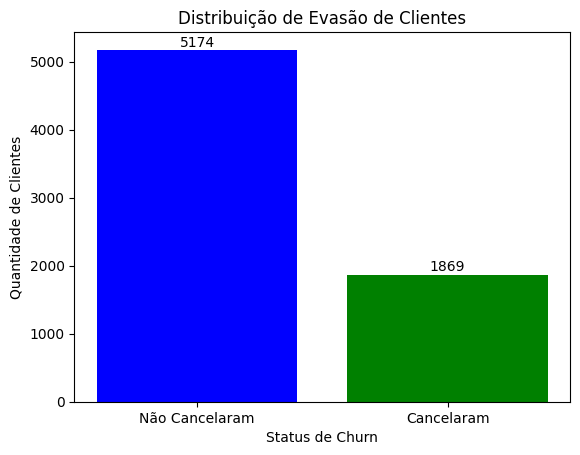

In [8]:
contagem_churn = df_analise['Churn'].value_counts()
plt.bar(['N√£o Cancelaram', 'Cancelaram'], contagem_churn, color=['blue', 'green'])
plt.title('Distribui√ß√£o de Evas√£o de Clientes')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Status de Churn')
for i, valor in enumerate(contagem_churn):
    plt.text(i, valor + 50, str(valor), ha='center')
plt.show()

## An√°lise por genero

In [9]:
agrup_genero = df_analise.groupby(['customer_gender', 'Churn']).size().unstack().fillna(0)
agrup_genero

Churn               0    1
customer_gender           
Female           2549  939
Male             2625  930

## An√°lise por senioridade

In [22]:
agrup_senioridade = df_analise.groupby(['customer_SeniorCitizen', 'Churn']).size().unstack().fillna(0)
agrup_senioridade

Churn                      0     1
customer_SeniorCitizen            
0                       4508  1393
1                        666   476

## An√°lise de Planos Contratados
Vamos analisar quantos clientes contrataram cada plano e quantos deles cancelaram ou permaneceram com os servi√ßos.

In [11]:
planos = [
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'phone_PhoneService'
]

tabelas = []

for plano in planos:
    tab = df_analise.groupby([plano, 'Churn']).size().unstack(fill_value=0)
    tab['Total'] = tab[0] + tab[1]
    tab.columns = ['Sem_Churn', 'Com_Churn', 'Total']
    tab['Plano'] = plano
    tab['Contratado'] = tab.index
    tabelas.append(tab.reset_index(drop=True))

tabela_planos = pd.concat(tabelas, ignore_index=True)
tabela_contratados = tabela_planos[tabela_planos['Contratado'] == 1].reset_index(drop=True)
tabela_contratados = tabela_contratados[['Plano', 'Total', 'Sem_Churn', 'Com_Churn']]
tabela_contratados.sort_values('Total', ascending=False)

Plano  Total  Sem_Churn  Com_Churn
7         phone_PhoneService   6361       4662       1699
0        phone_MultipleLines   2971       2121        850
6   internet_StreamingMovies   2732       1914        818
5       internet_StreamingTV   2707       1893        814
2      internet_OnlineBackup   2429       1906        523
3  internet_DeviceProtection   2422       1877        545
4       internet_TechSupport   2044       1734        310
1    internet_OnlineSecurity   2019       1724        295

## An√°lise de M√©todos de Pagamento


In [12]:
df_analise.groupby(['account_PaymentMethod', 'Churn']).size().unstack().fillna(0)

Churn                         0     1
account_PaymentMethod                
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

## An√°lise de Tempo de contrato

In [13]:
agrup_tempo_contrato = df_analise.groupby(['customer_tenure', 'Churn']).size().unstack().fillna(0)
agrup_tempo_contrato

Churn                0      1
customer_tenure              
0                 11.0    0.0
1                233.0  380.0
2                115.0  123.0
3                106.0   94.0
4                 93.0   83.0
...                ...    ...
68                91.0    9.0
69                87.0    8.0
70               108.0   11.0
71               164.0    6.0
72               356.0    6.0

[73 rows x 2 columns]

In [14]:
tabela = df_analise.groupby(['customer_tenure', 'Churn']).size().unstack().fillna(0)
tabela['% churn'] = (tabela[1] / (tabela[0] + tabela[1]) * 100).round(2)
tabela_percentual = tabela[[0, 1, '% churn']]

tabela_percentual.head(10)

Churn                0      1  % churn
customer_tenure                       
0                 11.0    0.0     0.00
1                233.0  380.0    61.99
2                115.0  123.0    51.68
3                106.0   94.0    47.00
4                 93.0   83.0    47.16
5                 69.0   64.0    48.12
6                 70.0   40.0    36.36
7                 80.0   51.0    38.93
8                 81.0   42.0    34.15
9                 73.0   46.0    38.66

## Analise de Custo total mensal

In [15]:
media_gasto = df_analise.groupby(['Churn'])[['account_Charges_Monthly', 'Contas_Diarias']].mean().round(2)
media_gasto

account_Charges_Monthly  Contas_Diarias
Churn                                         
0                        61.27            2.04
1                        74.44            2.48

## Analise de Custo mensal e Custo Diario por tempo de contrato

In [16]:
media_gasto = df_analise.groupby(['customer_tenure', 'Churn'])[['account_Charges_Monthly', 'Contas_Diarias']].mean().round(2)

# reorganizar a tabela (Churn vira coluna)
media_gasto_descompactada = media_gasto.unstack().swaplevel(axis=1).sort_index(axis=1)
media_gasto_descompactada

Churn                        0                                      1  \
                Contas_Diarias account_Charges_Monthly Contas_Diarias   
customer_tenure                                                         
0                         1.38                   41.42            NaN   
1                         1.26                   37.91           1.94   
2                         1.60                   47.88           2.20   
3                         1.70                   50.92           2.20   
4                         1.52                   45.65           2.35   
...                        ...                     ...            ...   
68                        2.36                   70.88           3.27   
69                        2.27                   68.19           3.32   
70                        2.47                   74.21           3.26   
71                        2.43                   72.95           3.17   
72                        2.68                   80.42           3.23   

Churn                                    
                account_Charges_Monthly  
customer_tenure                          
0                                   NaN  
1                                 58.20  
2                                 65.92  
3                                 66.01  
4                                 70.64  
...                                 ...  
68                                98.01  
69                                99.45  
70                                97.65  
71                                95.13  
72                                96.88  

[73 rows x 4 columns]

## Analise de Custo Diario

In [17]:
# 1- lista de planos a serem analisados
planos = [
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'phone_PhoneService'
]

# 2 - criar uma lista para armazenar os dados
Contas_Diarias_churn = []

# 3 - Criar o loop
for plano in planos:
    # filtra clientes que contrataram o plano
    contratados = df_analise[df_analise[plano] == 1]

    # ticket m√©dio geral
    ticket_total = contratados['account_Charges_Monthly'].mean()

    # custo m√©dio di√°rio de quem deu churn
    contas_diaria_clientes_churn = contratados[contratados['Churn'] == 1]['Contas_Diarias'].mean()

    # custo m√©dio di√°rio de quem n√£o deu churn
    contas_diaria_clientes_ativos = contratados[contratados['Churn'] == 0]['Contas_Diarias'].mean()

    # calcular a diferen√ßa
    varia√ß√£o_churn_vs_artivos = (contas_diaria_clientes_churn - contas_diaria_clientes_ativos) / contas_diaria_clientes_ativos * 100

    # adiciona ao dicion√°rio
    Contas_Diarias_churn.append({
        'Plano': plano,
        'Contas_Diarias_Sem_Churn': round(contas_diaria_clientes_ativos, 2),
        'Contas_Diarias_Com_Churn': round(contas_diaria_clientes_churn, 2),
        'Varia√ß√£o_Churn_vs_Ativos': round(varia√ß√£o_churn_vs_artivos, 2)
    })

# criaa um DataFrame com os resultados
df_Contas_Diarias = pd.DataFrame(Contas_Diarias_churn)
df_Contas_Diarias.sort_values('Varia√ß√£o_Churn_vs_Ativos', ascending=False, inplace=True)

df_Contas_Diarias.head(10)


Plano  Contas_Diarias_Sem_Churn  \
7         phone_PhoneService                      2.11   
0        phone_MultipleLines                      2.64   
4       internet_TechSupport                      2.67   
3  internet_DeviceProtection                      2.79   
2      internet_OnlineBackup                      2.74   
1    internet_OnlineSecurity                      2.61   
5       internet_StreamingTV                      2.93   
6   internet_StreamingMovies                      2.93   

   Contas_Diarias_Com_Churn  Varia√ß√£o_Churn_vs_Ativos  
7                      2.60                     23.61  
0                      2.97                     12.44  
4                      2.81                      5.27  
3                      2.94                      5.23  
2                      2.87                      4.46  
1                      2.72                      4.11  
5                      3.02                      2.87  
6                      3.00                      2.37

# üìà Gr√°ficos

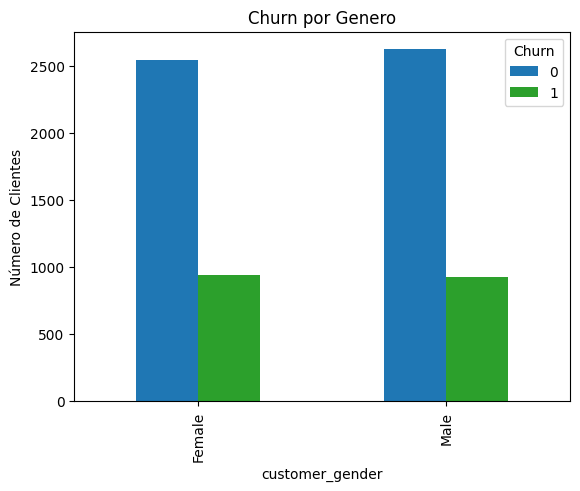

In [19]:
# churn por genero
genero_df = df_analise.groupby(['customer_gender', 'Churn']).size().unstack().fillna(0)

genero_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Genero"
).set_ylabel("N√∫mero de Clientes")

plt.show()


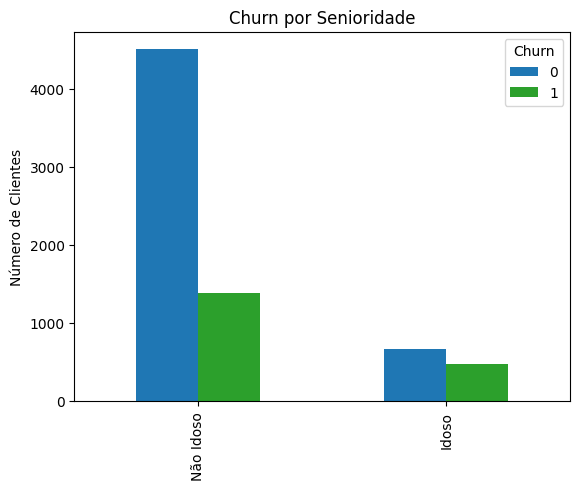

In [21]:
# churn por senioridade

senioridade_df = df_analise.groupby(['customer_SeniorCitizen', 'Churn']).size().unstack().fillna(0)
senioridade_df.index = ['Nao Idoso', 'Idoso']

senioridade_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Senioridade"
).set_ylabel("N√∫mero de Clientes")

plt.show()


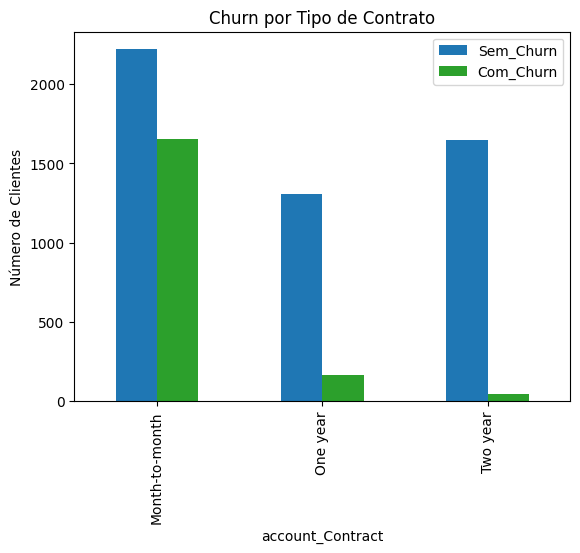

In [23]:
# churn por tipo de contrato
contratos_df = df_analise.groupby(['account_Contract', 'Churn']).size().unstack().fillna(0)
contratos_df.columns = ['Sem_Churn', 'Com_Churn']

contratos_df[['Sem_Churn', 'Com_Churn']].plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Tipo de Contrato"
).set_ylabel("N√∫mero de Clientes")

plt.show()

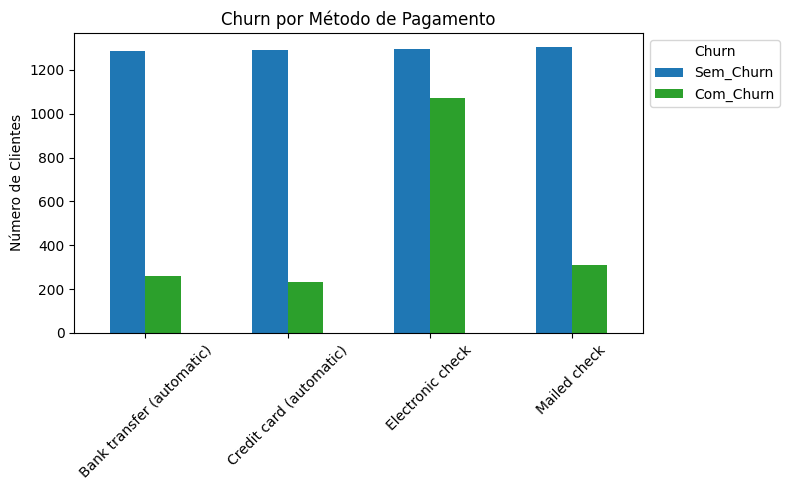

In [35]:
# churn por m√©todo de pagamento

import matplotlib.pyplot as plt

pagamento_df = df_analise.groupby(['account_PaymentMethod', 'Churn']).size().unstack().fillna(0)
pagamento_df.columns = ['Sem_Churn', 'Com_Churn']

ax = pagamento_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    figsize=(8, 5)
)

plt.title("Churn por M√©todo de Pagamento")
plt.ylabel("N√∫mero de Clientes")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


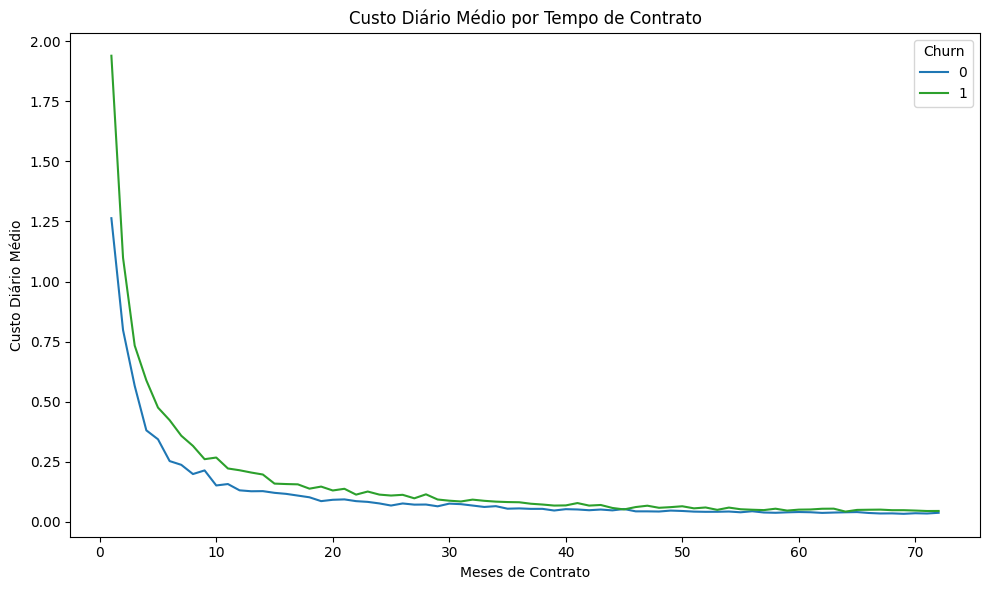

In [41]:
# custo di√°rio m√©dio por tempo de contrato
df_analise_filtrado = df_analise[df_analise['customer_tenure'] >= 1].copy()

df_analise_filtrado['Contas_Diarias'] = df_analise_filtrado['account_Charges_Monthly'] / (df_analise_filtrado['customer_tenure'] * 30)

tempo_df = df_analise_filtrado.groupby(['customer_tenure', 'Churn'])['Contas_Diarias'].mean().unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(tempo_df[0], label='0', color='#1f77b4')  # Sem churn
plt.plot(tempo_df[1], label='1', color='#2ca02c')  # Com churn

plt.title("Custo Di√°rio M√©dio por Tempo de Contrato")
plt.xlabel("Meses de Contrato")
plt.ylabel("Custo Di√°rio M√©dio")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()


# üìÑ Relat√≥rio Final

### Objetivo

Esta an√°lise tem como objetivo identificar os principais fatores que levam ao cancelamento de planos (churn) por parte dos clientes da Telecom X. Al√©m disso, propomos poss√≠veis a√ß√µes que podem ser adotadas para mitigar esse comportamento e aumentar a reten√ß√£o de clientes.

---

### Prepara√ß√£o dos Dados

Antes da an√°lise, realizamos a prepara√ß√£o da base de dados conforme as etapas abaixo:

1. **Importa√ß√£o das bibliotecas**: Pandas, Matplotlib e Seaborn.  
2. **Leitura dos dados**: Base original em JSON, normalizada e convertida para DataFrame.  
3. **Sele√ß√£o de colunas relevantes** para an√°lise do churn.  
4. **Cria√ß√£o da vari√°vel `Contas_Diarias`**, representando o custo di√°rio de cada cliente.  
5. **Convers√£o de vari√°veis categ√≥ricas** ("Sim"/"N√£o") para formato bin√°rio, tratamento de valores ausentes e padroniza√ß√£o da base.

---

### Vis√£o Geral da Base

A base cont√©m **7.043 clientes**, dos quais **1.869 deram churn**, representando aproximadamente **27% da base total**.

---

### An√°lise por G√™nero

- A distribui√ß√£o por g√™nero est√° praticamente equilibrada entre os clientes com e sem churn.
- N√£o h√° ind√≠cios de correla√ß√£o significativa entre g√™nero e o cancelamento dos planos.

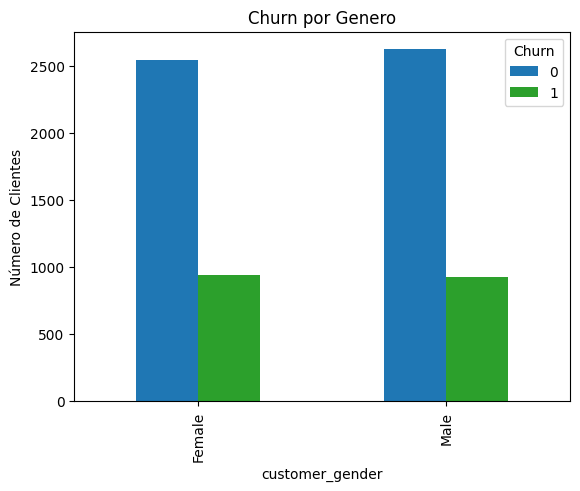

In [42]:
# churn por genero
genero_df = df_analise.groupby(['customer_gender', 'Churn']).size().unstack().fillna(0)

genero_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Genero"
).set_ylabel("N√∫mero de Clientes")

plt.show()

üìå Conclus√£o: G√™nero **n√£o √© uma vari√°vel relevante** nesta base.

---

### An√°lise por Senioridade

- Apenas **16% da base** possui 65 anos ou mais.
- Dentre os clientes que deram churn, apenas **~25%** pertencem ao grupo 65+.

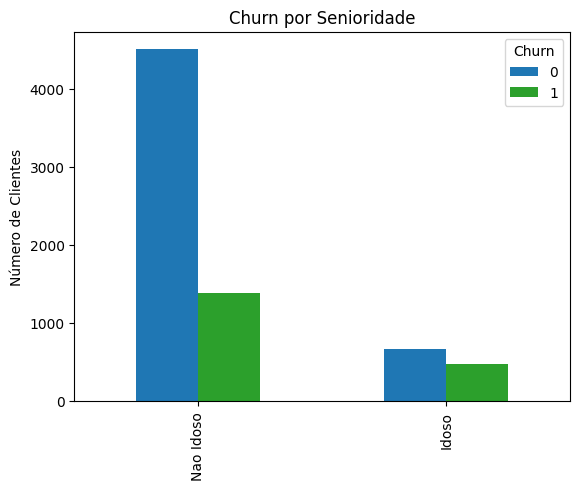

In [43]:
# churn por senioridade

senioridade_df = df_analise.groupby(['customer_SeniorCitizen', 'Churn']).size().unstack().fillna(0)
senioridade_df.index = ['Nao Idoso', 'Idoso']

senioridade_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    title="Churn por Senioridade"
).set_ylabel("N√∫mero de Clientes")

plt.show()

üìå Conclus√£o: Senioridade **tamb√©m n√£o demonstra rela√ß√£o** com o churn nesta amostra.

---

### Planos Contratados

- O plano de telefone possui o maior volume absoluto de churn, mas tamb√©m √© o mais popular.
- N√£o h√° evid√™ncias de que um plano espec√≠fico esteja diretamente relacionado ao cancelamento.

In [47]:
tabela_contratados.sort_values('Total', ascending=False)

Plano  Total  Sem_Churn  Com_Churn
7         phone_PhoneService   6361       4662       1699
0        phone_MultipleLines   2971       2121        850
6   internet_StreamingMovies   2732       1914        818
5       internet_StreamingTV   2707       1893        814
2      internet_OnlineBackup   2429       1906        523
3  internet_DeviceProtection   2422       1877        545
4       internet_TechSupport   2044       1734        310
1    internet_OnlineSecurity   2019       1724        295

üìå Conclus√£o: A an√°lise por planos requer cautela, uma vez que o volume de cancelamentos est√° diretamente relacionado √† representatividade de cada plano na base de clientes

---



### M√©todos de Pagamento

- O m√©todo **"Electronic check"** √© respons√°vel por mais de **57% dos cancelamentos**.
- Clientes com este m√©todo possuem churn desproporcional em rela√ß√£o ao restante da base.


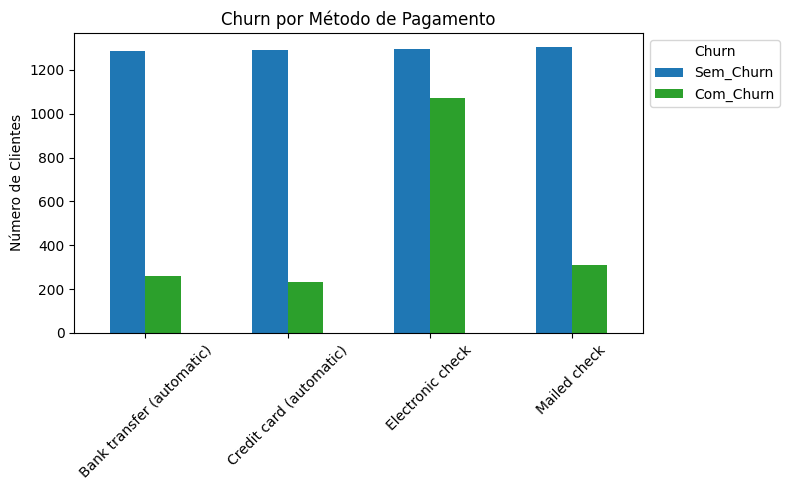

In [45]:
# churn por m√©todo de pagamento

import matplotlib.pyplot as plt

pagamento_df = df_analise.groupby(['account_PaymentMethod', 'Churn']).size().unstack().fillna(0)
pagamento_df.columns = ['Sem_Churn', 'Com_Churn']

ax = pagamento_df.plot(
    kind='bar',
    color=['#1f77b4', '#2ca02c'],
    figsize=(8, 5)
)

plt.title("Churn por M√©todo de Pagamento")
plt.ylabel("N√∫mero de Clientes")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

üìå Conclus√£o: M√©todo de pagamento √© um **fator que influencia** na evas√£o de clientes.

---

### Tempo de Contrato

- A maioria dos cancelamentos ocorre **entre o 1¬∫ e 2¬∫ m√™s de contrato**.
- Esse comportamento sugere churn precoce e poss√≠vel desalinhamento de expectativas.


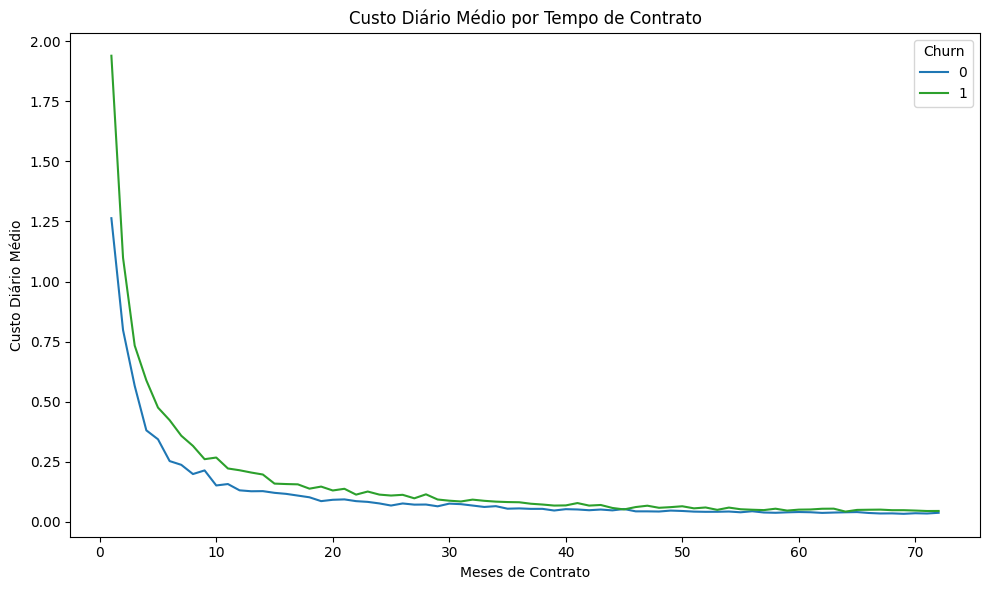

In [46]:
# custo di√°rio m√©dio por tempo de contrato
df_analise_filtrado = df_analise[df_analise['customer_tenure'] >= 1].copy()

df_analise_filtrado['Contas_Diarias'] = df_analise_filtrado['account_Charges_Monthly'] / (df_analise_filtrado['customer_tenure'] * 30)

tempo_df = df_analise_filtrado.groupby(['customer_tenure', 'Churn'])['Contas_Diarias'].mean().unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(tempo_df[0], label='0', color='#1f77b4')  # sem churn
plt.plot(tempo_df[1], label='1', color='#2ca02c')  # com churn

plt.title("Custo Di√°rio M√©dio por Tempo de Contrato")
plt.xlabel("Meses de Contrato")
plt.ylabel("Custo Di√°rio M√©dio")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()

üìå Conclus√£o: Contratos mais longos tendem a apresentar **maior reten√ß√£o**.

---


### An√°lise de Custo

- Clientes que cancelaram apresentam, em m√©dia, custos **mais elevados** em todas as m√©tricas: custo total, mensal e di√°rio.
- Essa diferen√ßa persiste ao segmentar por tempo de contrato e por tipo de servi√ßo.
- Nos planos de internet, a varia√ß√£o de custo entre churn e n√£o churn foi de at√© **5,2%**.
- Em planos de telefonia, a varia√ß√£o foi **superior a 12%**, chegando a **23%** no plano base de uma linha.


In [48]:
df_Contas_Diarias.head(10)

Plano  Contas_Diarias_Sem_Churn  \
7         phone_PhoneService                      2.11   
0        phone_MultipleLines                      2.64   
4       internet_TechSupport                      2.67   
3  internet_DeviceProtection                      2.79   
2      internet_OnlineBackup                      2.74   
1    internet_OnlineSecurity                      2.61   
5       internet_StreamingTV                      2.93   
6   internet_StreamingMovies                      2.93   

   Contas_Diarias_Com_Churn  Varia√ß√£o_Churn_vs_Ativos  
7                      2.60                     23.61  
0                      2.97                     12.44  
4                      2.81                      5.27  
3                      2.94                      5.23  
2                      2.87                      4.46  
1                      2.72                      4.11  
5                      3.02                      2.87  
6                      3.00                      2.37

üìå Conclus√£o: O **pre√ßo √© o principal fator associado ao churn**. Planos com maior custo tendem a ter maior evas√£o.

---

### Conclus√µes e Recomenda√ß√µes

- O comportamento de churn est√° fortemente associado ao **custo elevado**, especialmente em contratos mensais.
- M√©todos de pagamento como **"Electronic check"** apresentam correla√ß√£o alta com cancelamentos.
- A concentra√ß√£o de churn nos primeiros meses sugere a necessidade de **refor√ßar o onboarding e os primeiros contatos** com o cliente.
- Recomenda√ß√£o:
  - Revisar a estrutura de pre√ßos dos planos;
  - Oferecer incentivos para fideliza√ß√£o em contratos mais longos;
  - Priorizar formas de pagamento mais confi√°veis e vinculadas;
  - Monitorar e atuar nos primeiros 90 dias de contrato com a√ß√µes preventivas.

---